In [1]:
import numpy as np
import random
import os
import cv2
import itertools
import matplotlib.pyplot as plt

# Preprocessing the Real Signature Dataset

In [4]:
width = 200
height = 150
num_sig = 11

In [5]:
def make_pairs(genuine, forged):

    #create (genuine, genuine) pairs
    gen_gen_pairs = []
    for t in itertools.combinations(genuine, 2):
        gen_gen_pairs.append([t[0], t[1]])

    #create (genuine, forged) pairs
    gen_forg_pairs_temp = []
    for t in itertools.product(genuine, forged):
        gen_forg_pairs_temp.append([t[0], t[1]])

    gen_gen_pairs = np.array(gen_gen_pairs)
    gen_forg_pairs_temp = np.array(gen_forg_pairs_temp)

    # pick the same number of (genuine, forged) pairs as the (genuine, genuine)
    # ones in order to balance the data
    gen_forg_indices = random.sample(range(1, gen_forg_pairs_temp.shape[0]), gen_gen_pairs.shape[0])

    gen_forg_pairs = []
    for ind in gen_forg_indices:
        gen_forg_pairs.append(gen_forg_pairs_temp[ind])

    gen_forg_pairs = np.array(gen_forg_pairs)

    return gen_gen_pairs, gen_forg_pairs


def prepare_data(genuine, forged, X, y):

    gen_gen_pairs, gen_forg_pairs = make_pairs(genuine, forged)
    all_pairs = np.empty((552, 2, width, height))
    all_pairs = np.concatenate((gen_gen_pairs, gen_forg_pairs), axis = 0)
    print(f"All pairs shape: {all_pairs.shape}")
    labels = np.concatenate((np.ones(gen_gen_pairs.shape[0]), np.zeros(gen_forg_pairs.shape[0])), axis = 0)
    print(f"Labels shape: {labels.shape}")
    
    combined = list(zip(all_pairs, labels))
    random.shuffle(combined)
    shuffled_pairs, shuffled_labels = zip(*combined)
    
    X[:] = shuffled_pairs
    y[:] = shuffled_labels

In [ ]:
parent_path = "../real signatures/"

In [8]:
X = np.empty((num_sig * 2 * 276, 2, height, width))
y = np.empty((num_sig * 2 * 276))

m = 0
for ind in range(1, num_sig+1):

    print(f"Iteration number {m+1}")
    genuine = np.empty((24, height, width))
    forged = np.empty((24, height, width))

    path = parent_path + "signatures_" + str(ind)

    i = 0
    j = 0
    for image in os.listdir(path):
        image_path = os.path.join(path, image)
        if os.path.isfile(image_path):
          img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
          img = 255 - img
          img = cv2.resize(img, (width, height))
          if i < 24 and image.startswith("original"):
            genuine[i] = img
            i += 1
          elif j < 24 and image.startswith("forgeries"):
            forged[j] = img
            j += 1

    #prepare_data(genuine, forged, X_train, y_train, m)
    prepare_data(genuine, forged, X[m*552:(m+1)*552], y[m*552:(m+1)*552])
    m += 1


print(f"X shape : {X.shape}")
print(f"y shape : {y.shape}")

Iteration number 1
All pairs shape: (552, 2, 150, 200)
Labels shape: (552,)
Iteration number 2
All pairs shape: (552, 2, 150, 200)
Labels shape: (552,)
Iteration number 3
All pairs shape: (552, 2, 150, 200)
Labels shape: (552,)
Iteration number 4
All pairs shape: (552, 2, 150, 200)
Labels shape: (552,)
Iteration number 5
All pairs shape: (552, 2, 150, 200)
Labels shape: (552,)
Iteration number 6
All pairs shape: (552, 2, 150, 200)
Labels shape: (552,)
Iteration number 7
All pairs shape: (552, 2, 150, 200)
Labels shape: (552,)
Iteration number 8
All pairs shape: (552, 2, 150, 200)
Labels shape: (552,)
Iteration number 9
All pairs shape: (552, 2, 150, 200)
Labels shape: (552,)
Iteration number 10
All pairs shape: (552, 2, 150, 200)
Labels shape: (552,)
Iteration number 11
All pairs shape: (552, 2, 150, 200)
Labels shape: (552,)
X shape : (6072, 2, 150, 200)
y shape : (6072,)


In [9]:
def visualize(pairs, labels, to_show=6, num_col=3, predictions=None, test=False):
    """Creates a plot of pairs and labels, and prediction if it's test dataset.

    Arguments:
        pairs: Numpy Array, of pairs to visualize, having shape
               (Number of pairs, 2, 28, 28).
        to_show: Int, number of examples to visualize (default is 6)
                `to_show` must be an integral multiple of `num_col`.
                 Otherwise it will be trimmed if it is greater than num_col,
                 and incremented if if it is less then num_col.
        num_col: Int, number of images in one row - (default is 3)
                 For test and train respectively, it should not exceed 3 and 7.
        predictions: Numpy Array of predictions with shape (to_show, 1) -
                     (default is None)
                     Must be passed when test=True.
        test: Boolean telling whether the dataset being visualized is
              train dataset or test dataset - (default False).

    Returns:
        None.
    """

    # Define num_row
    # If to_show % num_col != 0
    #    trim to_show,
    #       to trim to_show limit num_row to the point where
    #       to_show % num_col == 0
    #
    # If to_show//num_col == 0
    #    then it means num_col is greater then to_show
    #    increment to_show
    #       to increment to_show set num_row to 1
    num_row = to_show // num_col if to_show // num_col != 0 else 1

    # `to_show` must be an integral multiple of `num_col`
    #  we found num_row and we have num_col
    #  to increment or decrement to_show
    #  to make it integral multiple of `num_col`
    #  simply set it equal to num_row * num_col
    to_show = num_row * num_col

    # Plot the images
    fig, axes = plt.subplots(num_row, num_col, figsize=(5, 5))
    
    for i in range(to_show):
        # If the number of rows is 1, the axes array is one-dimensional
        if num_row == 1:
            ax = axes[i % num_col]
        else:
            ax = axes[i // num_col, i % num_col]
        
        n = random.randint(0, pairs.shape[0])
        print(f"Index to show: {n}")
        ax.imshow(np.concatenate([pairs[n][0], pairs[n][1]], axis=1), cmap="gray")
        ax.set_axis_off()
        if test:
            ax.set_title("True: {} | Pred: {:.5f}".format(labels[n], predictions[n][0]))
        else:
            ax.set_title("Label: {}".format(labels[n]))
    if test:
        plt.tight_layout(rect=(0, 0, 1.9, 1.9), w_pad=0.0)
    else:
        plt.tight_layout(rect=(0, 0, 1.5, 1.5))
    plt.show()

Index to show: 5345
Index to show: 3655
Index to show: 682
Index to show: 2864


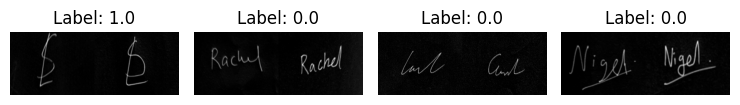

In [10]:
visualize(X[:-1], y[:-1], to_show = 4, num_col = 4)

In [ ]:
np.save("X_test_siam.npy", X)

In [12]:
np.save("y_test_siam.npy", y)